<a href="https://colab.research.google.com/github/niikhill/AI-ML-Class/blob/main/least_square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# from google.colab import files
# files.upload()

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/niikhill/AI-ML-Class/main/datasets/headbrain.csv')
print(data.shape)

(59, 4)


In [3]:
print(data.head())

   Gender  Age Range  Head Size  Brain Weight (grams)
0       1          1       4512                  1530
1       1          1       3738                  1297
2       1          1       4261                  1335
3       1          1       3777                  1282
4       1          1       4177                  1590


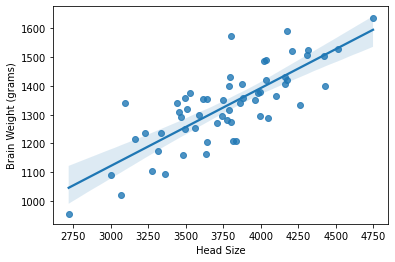

In [4]:
sns.regplot(x=data['Head Size'],y=data['Brain Weight (grams)']);

In [5]:
#Computing X and y
X = data['Head Size'].values
Y = data['Brain Weight (grams)'].values

In [6]:
X=X.reshape((len(X),1))

In [7]:
reg = LinearRegression();

In [8]:
reg = reg.fit(X,Y)

In [9]:
Y_pred = reg.predict(X)

In [10]:
#Root mean squared error(RMSE) is the square root of the average of squared diff between prediction and actual observation.
#Here the error are squared before they are averaged, the RMSE gives a relatively high weight to large errors.
#So RMSE is more usefull when large error are particularly undesireable.
# In simple words RMSE penalize the large errors

rmse = np.sqrt(mean_squared_error(Y,Y_pred))
print("RMSE =",rmse)

RMSE = 82.20224448520042


In [11]:
#R-Squared os the "Percent of variance explained" by the model. R-Squared is the fraction by which the variance of the errors is less
#than the variance of the dependent variables.
r2 = reg.score(X,Y)
print("R2 Score =",r2)

R2 Score = 0.6378327820399066


In [12]:
#Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)


In [13]:
#Using the formula to calculate m and c
numer =0
denom =0
for i in range(n):
  numer +=(X[i] - mean_x)*(Y[i]-mean_y)
  denom += (X[i]-mean_x)**2
m = numer/denom
c = mean_y -(m*mean_x)

#Printing coefficent, These Cofficients are our slopes and intercepts values respectively. On substituting values in final equations 
#Brain Weight = 325.573421049+0.263429339489 * head Size

print("Coefficent")
print(m,c)

Coefficent
[0.2710172] [308.69902673]


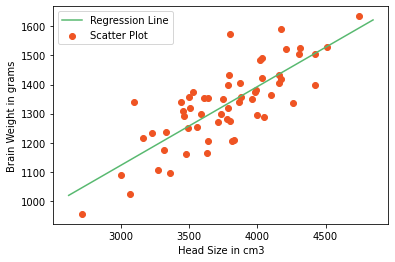

In [14]:
import matplotlib.pyplot as plt
#Plotting Values and regression lines

max_x = np.max(X)+100
min_x = np.min(X)-100

# Calcualting lines values x and y
x = np.linspace(min_x,max_x ,1000)
y = c + m * x

#plotting Line
plt.plot(x,y, color='#58b970',label="Regression Line")
#plotting scatter plot
plt.scatter(X,Y,c='#ef5423',label="Scatter Plot")

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()


In [15]:
# Calculating root mean squre Error
rmse =0
for i in range(n):
  y_pred = c + m * X[i]
  rmse +=(Y[i]-y_pred)**2
rmse = np.sqrt(rmse/n)
print("RMSE")
print(rmse)

RMSE
[82.20224449]


In [16]:
# Calculating R2 score

ss_tot = 0
ss_res = 0
for i in range(n):
  y_pred = c + m * X[i]
  ss_tot += (Y[i]-mean_y)**2
  ss_res += (Y[i]-y_pred)**2
r2 = 1 -(ss_res/ss_tot)
print("R2 score")
print(r2)

R2 score
[0.63783278]
